In [1]:
%pylab inline

import pandas as pd

pd.set_option('max_rows',3000)
pd.set_option('max_columns',3000)
pd.set_option('colwidth',3000)

Populating the interactive namespace from numpy and matplotlib


In [2]:
DIR = ''

train_purch = pd.read_csv(DIR + 'acct_purchases_long.tsv',sep='\t')
test_purch = pd.read_csv(DIR + 'acct_purchases_long_test.tsv',sep='\t')

purch = pd.concat({'train':train_purch,'test':test_purch})

In [3]:
wave_purch = pd.DataFrame(purch[purch.PROD_NM == 'Analytics Cloud'])

In [4]:
! date
behav1 = pd.read_csv(DIR + 'temporal_behaviors.tsv',sep='\t')
! date

Tue Jul 26 15:28:10 PDT 2016


/home/byang/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Tue Jul 26 15:30:22 PDT 2016


In [5]:
behav1.QRY_DATE.min()

'2014-05-01 00:00:00'

In [6]:
train = pd.DataFrame(behav1[(behav1.QRY_DATE == '2014-05-01 00:00:00') & (behav1.ACCOUNT_ID != '000000000000000')])

In [7]:
len(train)

272043

In [8]:
wave_purch['ACCOUNT_ID'] = wave_purch.ACCT_ID

In [9]:
train1 = train.merge(wave_purch[['ACCOUNT_ID','CLSD_DATE']],on='ACCOUNT_ID',how='left')

In [10]:
train1['CLSD_DATE'] = np.where(train1.CLSD_DATE == train1.CLSD_DATE,train1.CLSD_DATE, '2099-12-31 00:00:00')

In [11]:
len(train1[train1.CLSD_DATE < '2016-07-20'])

491

In [12]:
len(train1[train1.CLSD_DATE < '2015-12-01'])

172

In [13]:
len(train1[train1.CLSD_DATE < '2016-02-01'])

275

In [14]:
len(train1[train1.CLSD_DATE != train1.CLSD_DATE])

0

In [15]:
len(train1[train1.CLSD_DATE < '2014-05-01'])

1

In [16]:
pd.melt(train1.head(1))

,variable,value
0,QRY_DATE,2014-05-01 00:00:00
1,NUM_USERS,4
2,NUM_ACCOUNTS,2
3,NUM_LICENSES,NaN
4,NUM_CONTACTS,1
5,NUM_OPPTS,2
6,NUM_FORECASTS,0
7,NUM_REPORTS,31
8,NUM_LEADS,1
9,NUM_CASES,0


In [17]:
from datetime import datetime

from dateutil.relativedelta import relativedelta

tm = datetime.strptime('2014-05-01', '%Y-%m-%d')
obs_dates = []

for i in range(23):
    obs_dates.append(tm)
    tm = tm + relativedelta(months=1)

In [18]:
tm

datetime.datetime(2016, 4, 1, 0, 0)

In [19]:
for d in obs_dates:
    col_name = 'TIME' + d.strftime('%Y_%m_%d')
    train1[col_name] = np.where(train1.CLSD_DATE < d.strftime('%Y-%m-%d'),1,0)

In [23]:
train1.head()

,QRY_DATE,NUM_USERS,NUM_ACCOUNTS,NUM_LICENSES,NUM_CONTACTS,NUM_OPPTS,NUM_FORECASTS,NUM_REPORTS,NUM_LEADS,NUM_CASES,NUM_SOLUTIONS,NUM_CASE_QUEUES,NUM_CAMPAIGNS,ACCOUNT_ID,NUM_CUSTOM_APPS,NUM_CUSTOM_TABS,NUM_CUSTOM_OBJECTS,NUM_CUSTOM_OBJECT_RECORDS,NUM_DOCUMENTS,NUM_CONTRACTS,NUM_CASE_RECORD_TYPES,NUM_ESCALATION_RULES,NUM_DASHBOARDS,NUM_EMAIL_TEMPLATES,NUM_VF_PG_TOT,NUM_MASS_EMAILS,CLSD_DATE,TIME2014_05_01,TIME2014_06_01,TIME2014_07_01,TIME2014_08_01,TIME2014_09_01,TIME2014_10_01,TIME2014_11_01,TIME2014_12_01,TIME2015_01_01,TIME2015_02_01,TIME2015_03_01,TIME2015_04_01,TIME2015_05_01,TIME2015_06_01,TIME2015_07_01,TIME2015_08_01,TIME2015_09_01,TIME2015_10_01,TIME2015_11_01,TIME2015_12_01,TIME2016_01_01,TIME2016_02_01,TIME2016_03_01
0,2014-05-01 00:00:00,4,2.0,NaN,1.0,2.0,0.0,31,1,0,0.0,0,0.0,0013000000ZllAC,0,0,0,0,0,1.0,0,0,2,14,0,NaN,2099-12-31 00:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2014-05-01 00:00:00,4,43.0,NaN,101.0,0.0,0.0,0,0,0,0.0,0,0.0,0013000001GVLxe,0,1,0,0,0,0.0,0,0,0,2,0,NaN,2099-12-31 00:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2014-05-01 00:00:00,18,3.0,NaN,7.0,8.0,0.0,92,4,0,0.0,0,3.0,0013000001GVJVE,0,1,1,0,2,0.0,0,0,9,14,0,NaN,2099-12-31 00:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2014-05-01 00:00:00,44,140987.0,NaN,140636.0,219813.0,0.0,513,7131,7909,4.0,43,5.0,0013000000RXVjp,2,20,18,1981128,16,0.0,1,0,9,24,0,NaN,2099-12-31 00:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2014-05-01 00:00:00,23,160.0,NaN,390.0,380.0,0.0,85,1032,2,0.0,0,0.0,0013000000Zit3Q,3,8,8,2128,14,0.0,0,0,8,30,0,NaN,2099-12-31 00:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
purchases = []
targets = [t for t in train1.columns.tolist() if 'TIME' in t]

for t in targets:
    print t,train1[t].sum()

#train1['TIME2016_01_01'].sum(),train1['TIME2014_05_01'].sum()

TIME2014_05_01 1
TIME2014_06_01 1
TIME2014_07_01 1
TIME2014_08_01 1
TIME2014_09_01 1
TIME2014_10_01 1
TIME2014_11_01 2
TIME2014_12_01 4
TIME2015_01_01 6
TIME2015_02_01 13
TIME2015_03_01 31
TIME2015_04_01 40
TIME2015_05_01 49
TIME2015_06_01 59
TIME2015_07_01 68
TIME2015_08_01 76
TIME2015_09_01 91
TIME2015_10_01 107
TIME2015_11_01 149
TIME2015_12_01 172
TIME2016_01_01 201
TIME2016_02_01 275
TIME2016_03_01 453


In [24]:
def calc_lift(yhat,y):
    if len(yhat) != len(y):
        raise 'yhat and y are unequal length'
    df = pd.DataFrame(zip(yhat,y))
    df.columns = ['yhat','y']
    t = df.sort_values(by='yhat',ascending=False).head(int(len(df)/10.))['y'].sum()
    n = float(df.y.sum())
    print 'Test Result: %s of %s purchases in top 10 pct' % (t,n)
    return 10*t/n

In [25]:
features = [c for c in train1.columns.tolist() if 'NUM' in c]

In [26]:
! date
train1.fillna(0,inplace=True)
! date

Tue Jul 26 16:00:58 PDT 2016
Tue Jul 26 16:00:58 PDT 2016


In [27]:
CUTOFF = 'TIME2016_02_01'
#ns_test = train1[train1[CUTOFF] == 0]

In [35]:
np.random.seed(42)
msk = np.random.rand(len(train1)) < 0.04

#ns_train = train1
train1['ns_flag'] = np.where((train1[CUTOFF] == 0) & msk,1,0)
ns_test = pd.DataFrame(train1[(train1[CUTOFF] == 0) & (~msk)])

def train_test(TARGET,cls):
    ns_train = pd.DataFrame(train1[(train1[TARGET] == 1) | (train1.ns_flag == 1)])
    #ns_train = pd.DataFrame(train1)
    result = cls.fit(ns_train[features], ns_train[TARGET])
    ns_test['score'] = cls.predict_proba(ns_test[features])[:,1]
    positive_examples = ns_train[TARGET].sum()
    print '%s model trained on %s positives' % (TARGET,positive_examples)
    return (positive_examples,calc_lift(ns_test.score,ns_test.TIME2016_03_01))

In [36]:
msk

array([False, False, False, ..., False, False, False], dtype=bool)

In [29]:
sum(msk)

10732

In [33]:
from sklearn.linear_model import LogisticRegression
cls = LogisticRegression(class_weight='balanced')

! date
xlabels = []
flr_lifts = []
for t in targets:
    #print t,train_test(t)
    print '------------------------'
    positive_examples,lift = train_test(t,cls)
    print 'Lift = %s' % lift
    xlabels.append(positive_examples)
    flr_lifts.append(lift)
! date

Tue Jul 26 16:02:20 PDT 2016
------------------------
TIME2014_05_01 model trained on 1 positives
Test Result: 11 of 173.0 purchases in top 10 pct
Lift = 0.635838150289
------------------------
TIME2014_06_01 model trained on 1 positives
Test Result: 11 of 173.0 purchases in top 10 pct
Lift = 0.635838150289
------------------------
TIME2014_07_01 model trained on 1 positives
Test Result: 11 of 173.0 purchases in top 10 pct
Lift = 0.635838150289
------------------------
TIME2014_08_01 model trained on 1 positives
Test Result: 11 of 173.0 purchases in top 10 pct
Lift = 0.635838150289
------------------------
TIME2014_09_01 model trained on 1 positives
Test Result: 11 of 173.0 purchases in top 10 pct
Lift = 0.635838150289
------------------------
TIME2014_10_01 model trained on 1 positives
Test Result: 11 of 173.0 purchases in top 10 pct
Lift = 0.635838150289
------------------------
TIME2014_11_01 model trained on 2 positives
Test Result: 15 of 173.0 purchases in top 10 pct
Lift = 0.8670

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
cls = GradientBoostingClassifier()

! date
xlabels = []
fgbt_lifts = []
for t in targets:
    #print t,train_test(t)
    print '------------------------'
    positive_examples,lift = train_test(t,cls)
    print 'Lift = %s' % lift
    xlabels.append(positive_examples)
    fgbt_lifts.append(lift)
! date

Tue Jul 26 16:02:34 PDT 2016
------------------------
TIME2014_05_01 model trained on 1 positives
Test Result: 15 of 173.0 purchases in top 10 pct
Lift = 0.867052023121
------------------------
TIME2014_06_01 model trained on 1 positives
Test Result: 13 of 173.0 purchases in top 10 pct
Lift = 0.751445086705
------------------------
TIME2014_07_01 model trained on 1 positives
Test Result: 13 of 173.0 purchases in top 10 pct
Lift = 0.751445086705
------------------------
TIME2014_08_01 model trained on 1 positives
Test Result: 13 of 173.0 purchases in top 10 pct
Lift = 0.751445086705
------------------------
TIME2014_09_01 model trained on 1 positives
Test Result: 13 of 173.0 purchases in top 10 pct
Lift = 0.751445086705
------------------------
TIME2014_10_01 model trained on 1 positives
Test Result: 13 of 173.0 purchases in top 10 pct
Lift = 0.751445086705
------------------------
TIME2014_11_01 model trained on 2 positives
Test Result: 13 of 173.0 purchases in top 10 pct
Lift = 0.7514

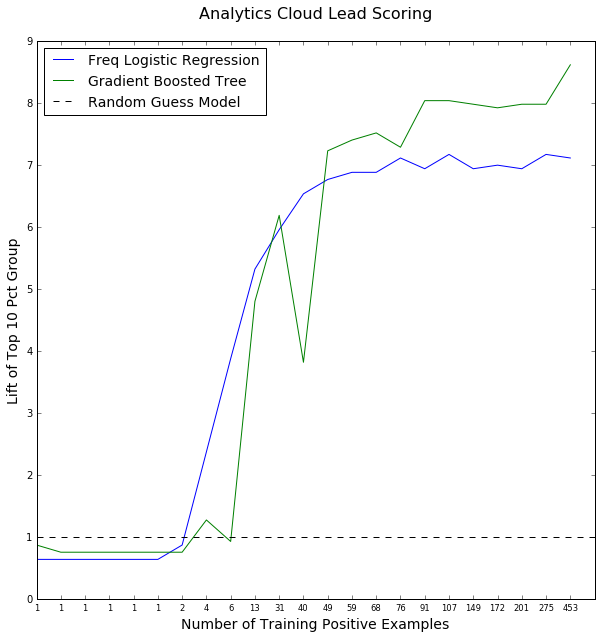

In [27]:
fig, ax = plt.subplots()

plot(flr_lifts,label='Freq Logistic Regression')
plot(fgbt_lifts,label='Gradient Boosted Tree')
    
plt.xticks(range(len(xlabels)), xlabels, size='small')

plot([0,len(xlabels)], [1,1], 'k--',label='Random Guess Model')
plt.legend(loc="upper left",fontsize=14)


ax.set_ylabel("Lift of Top 10 Pct Group",fontsize=14)
ax.set_xlabel("Number of Training Positive Examples",fontsize=14)

plt.title('Analytics Cloud Lead Scoring\n',fontsize=16)

plt.gcf().set_size_inches(10, 10);